<a href="https://colab.research.google.com/github/gvikas79/AdvancedTimeseries/blob/master/CNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [9]:
dataset, dataset_info = tfds.load("malaria", with_info = True, shuffle_files = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteY7X7JT/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [10]:
dataset

{Split('train'): <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [ ]:
#train_dataset = dataset[0]
#val_dataset = dataset[1]
#test_dataset = dataset[2]

In [ ]:
#print(len(train_dataset))
#print(len(val_dataset))
#print(len(test_dataset))

In [11]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE= len(dataset)

  train_ds = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
  val_test_ds = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_ds = val_test_ds.take(int(VAL_RATIO*DATASET_SIZE))
  test_ds = val_test_ds.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_ds, val_ds, test_ds

In [12]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
train_ds, val_ds, test_ds = split(dataset['train'], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)


In [13]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

22046
2755
2757


In [14]:
def get_label_str(label):
  if label == 0:
    return "Parasitized"
  else:
    return "Uninfected"

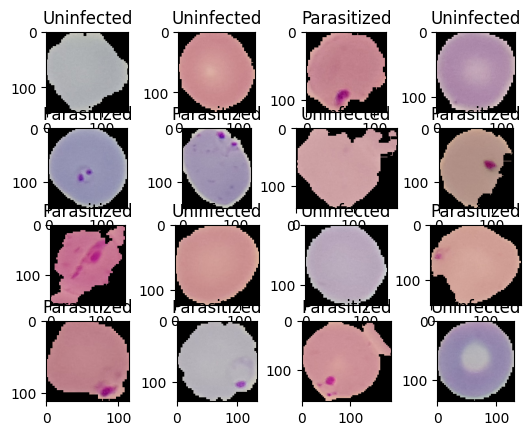

In [15]:
for i, sample in enumerate(train_ds.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(sample['image'])
  plt.title(get_label_str(sample['label'].numpy()))

In [16]:
im_size = 224

In [17]:
def resize_rescale(inputs):
  return tf. image.resize(inputs['image'], (im_size, im_size))/255., inputs['label']

In [18]:
train_dataset = train_ds.map(resize_rescale)

In [19]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [20]:
np.unique(image)

array([0.0000000e+00, 6.4359891e-04, 6.7876827e-04, ..., 7.8428203e-01,
       7.8588939e-01, 7.8774512e-01], dtype=float32)